In [1]:
import numpy as np 
import pandas as pd
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Observations :
# Total number of passengers : 891
# Number of people survived from 891 (mean) : 38%
# Most people belonged to Pclass : 3
# Maximum Fare paid for a ticket : 512
# Standard deviation : 49

In [7]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# Observations from categorical features:
# Male is the most common sex.
# Cabin and ticket columns hves many duplicate values 
# Embarked has three possible values with most passengers embarking from Southhampto 
# All names are uniques.

In [8]:
train.isnull().sum()/ len(train) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

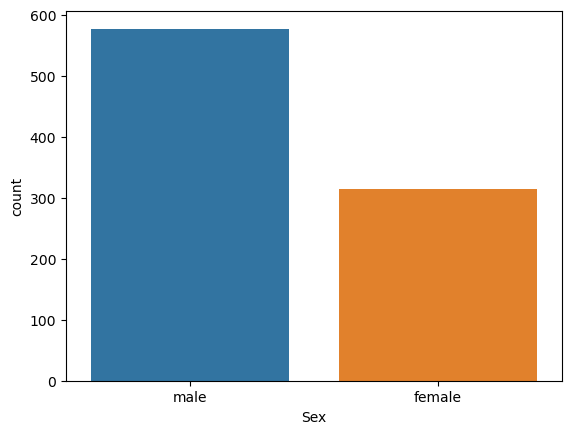

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
sns.countplot(x='Sex', data=train)
plt.show()
train['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


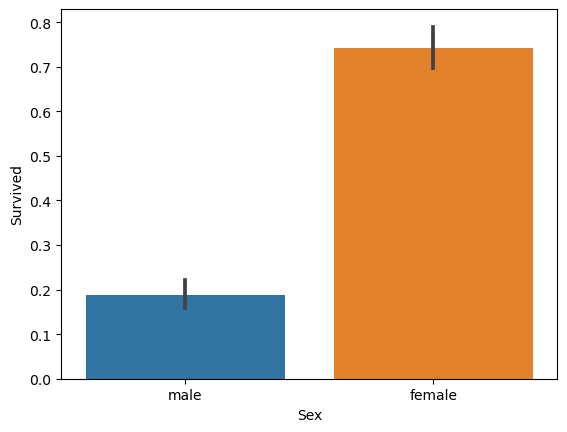

In [10]:
sns.barplot(x='Sex',y='Survived',data=train)
train.groupby('Sex',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


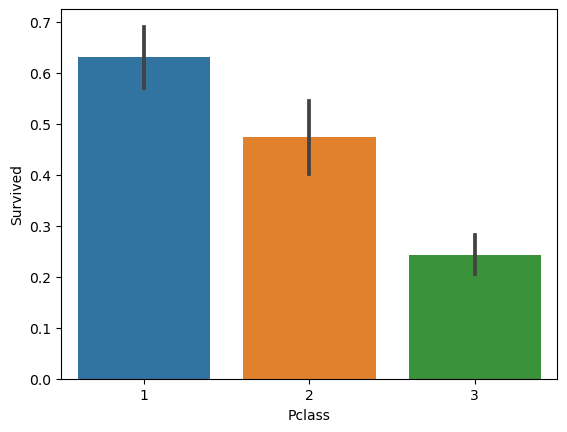

In [11]:
sns.barplot(x='Pclass',y='Survived',data=train)
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


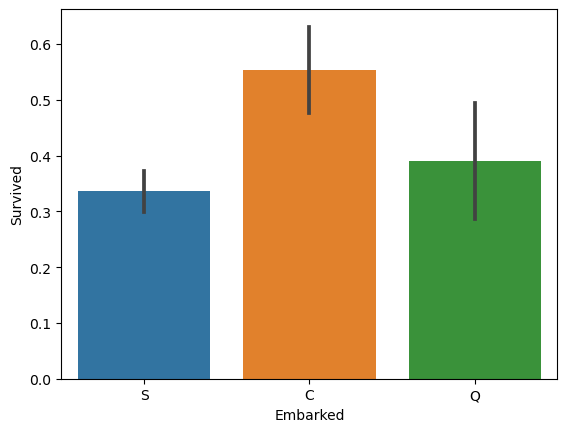

In [12]:
sns.barplot(x='Embarked',y='Survived',data=train)
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
# Passengers that embarked from port Cherbourg had a higher rate of Survival at 55% (may be due to Sex or socio-economic class)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


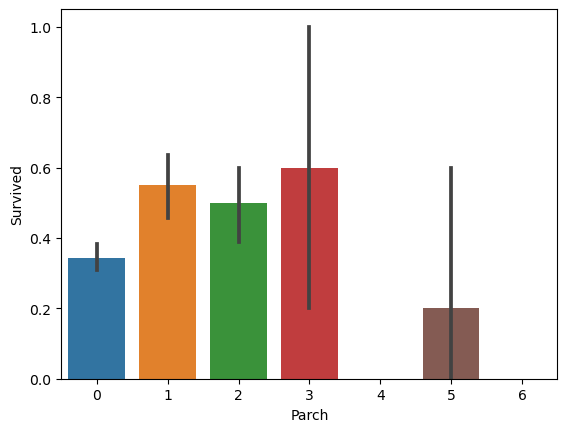

In [13]:
sns.barplot(x='Parch',y='Survived',data=train)
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


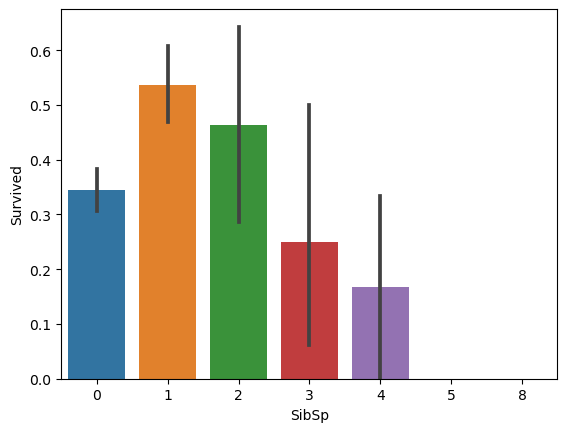

In [14]:
sns.barplot(x='SibSp',y='Survived',data=train)
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
# Having a spouse or 1 sibling had a positive effect on Survival as compared to being alone. However, the chances of survival go down with the number of siblings increase beyond 1.

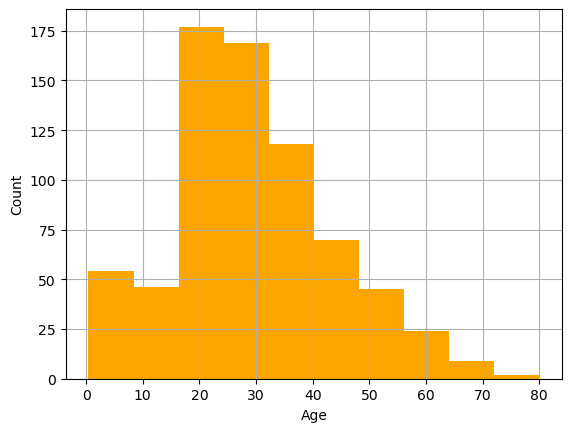

The Standard Deviation age of passengers is : 14
The Median age of passengers is : 28


In [15]:
train.Age.hist(bins=10,color='orange')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Standard Deviation age of passengers is :", int(train.Age.std()))
print("The Median age of passengers is :", int(train.Age.median()))

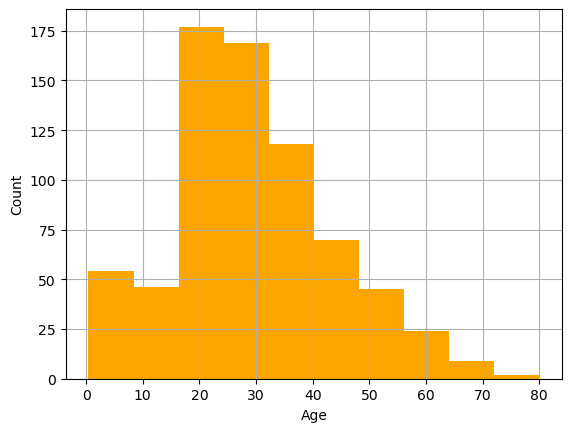

The Standard Deviation age of passengers is : 14
The Median age of passengers is : 28


In [16]:
train.Age.hist(bins=10,color='orange')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Standard Deviation age of passengers is :", int(train.Age.std()))
print("The Median age of passengers is :", int(train.Age.median()))

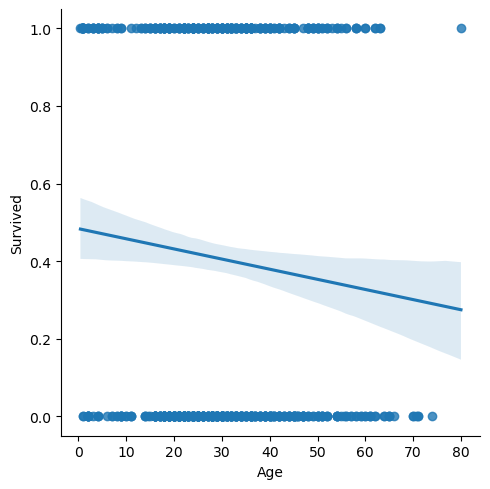

In [17]:
sns.lmplot(x='Age',y='Survived',data=train,palette='Set1')

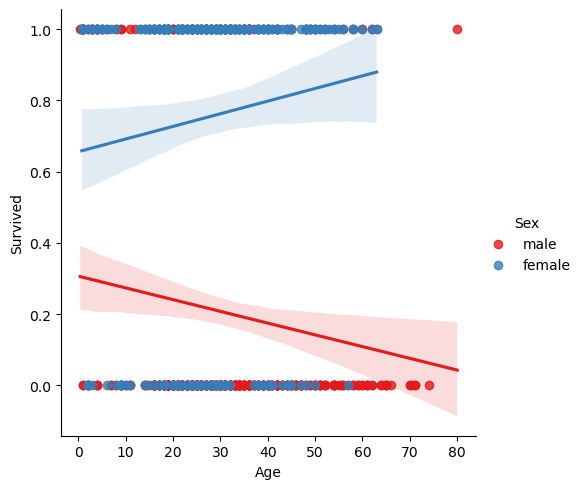

In [18]:
sns.lmplot(x='Age',y='Survived',data=train,hue='Sex',palette='Set1')

In [ ]:
# Age has an opposite effect on the survival of men and women. The chances of survival increase as the age of women increases.

,Sex,Age
0,female,27.0
1,male,29.0


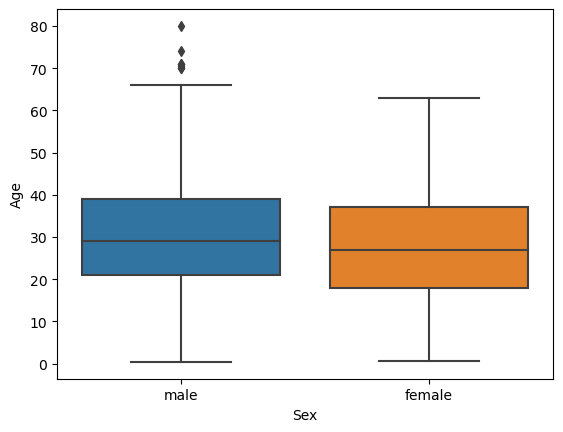

In [19]:
sns.boxplot(x='Sex',y='Age',data=train)
train.groupby('Sex',as_index=False)['Age'].median()

Mean value of Fare is : 32.204207968574636
Median value of Fare is : 14.4542


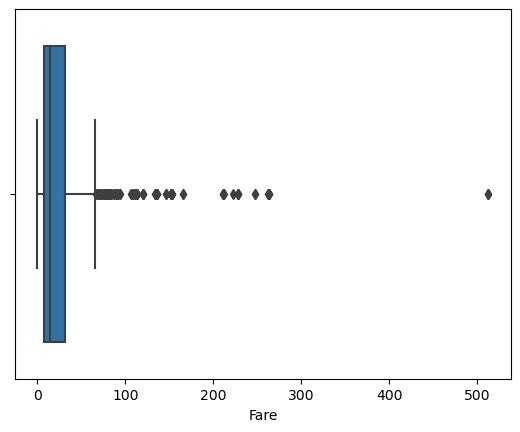

In [20]:
sns.boxplot(x="Fare",data=train)
print("Mean value of Fare is :",train.Fare.mean())
print("Median value of Fare is :",train.Fare.median())